In [0]:
# Fill in your name using the format below and student ID number
your_name = "Siksma, Casper"
student_id = "0902066"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [0]:
# Uncomment the following line to run in Google Colab
!pip install --quiet openml

     |████████████████████████████████| 163kB 2.9MB/s 


In [0]:
# Uncomment the following line to run in Google Colab
%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [0]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Casper, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
base_dir = '/content/drive/My Drive/Colab Notebooks' # For Google Colab
# base_dir = './'

In [0]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

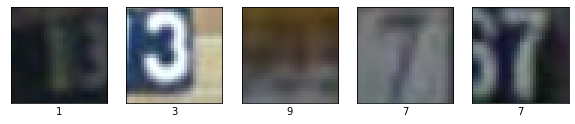

In [0]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model, model_from_json # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
  """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
  function following the Keras API. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  try:
    # if a json description is available, load config and then weights
    if os.path.isfile(os.path.join(base_dir, name+'.json')):
      json_file = open(os.path.join(base_dir, name+'.json'), 'r')
      loaded_model_json = json_file.read()
      json_file.close()
      model = model_from_json(loaded_model_json)
      model.load_weights(os.path.join(base_dir, name+extension))
    # else just load the entire model from hdf5 file
    else:
      model = load_model(os.path.join(base_dir, name+extension))
  except OSError:
    shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    return False
  return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
  """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  path = os.path.join(base_dir, name+extension)
  model.save(path)
  size = os.path.getsize(path)
  # If model > 100MB, store the weights and architecture only.
  if size > 100*1024*1024:
    print("Model larger than 100MB, storing weights only.")
    model.save_weights(path)
    model_json = model.to_json()
    with open(os.path.join(base_dir, name+".json"), "w") as json_file:
        json_file.write(model_json)

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/30
63544/63544 [==============================] - 4s 63us/sample - loss: 1.7550 - accuracy: 0.4025 - val_loss: 1.3081 - val_accuracy: 0.5849
Epoch 2/30
63544/63544 [==============================] - 3s 53us/sample - loss: 1.1505 - accuracy: 0.6401 - val_loss: 1.0469 - val_accuracy: 0.6860
Epoch 3/30
63544/63544 [==============================] - 3s 53us/sample - loss: 0.9760 - accuracy: 0.6995 - val_loss: 0.9643 - val_accuracy: 0.7039
Epoch 4/30
63544/63544 [==============================] - 3s 53us/sample - loss: 0.8808 - accuracy: 0.7312 - val_loss: 0.8644 - val_accuracy: 0.7419
Epoch 5/30
63544/63544 [==============================] - 3s 53us/sample - loss: 0.8205 - accuracy: 0.7493 - val_loss: 0.8305 - val_accuracy: 0.7466
Epoch 6/30
63544/63544 [==============================] - 3s 53us/sample - loss: 0.7746 - accuracy: 0.7638 - val_loss: 0.7936 - val_accuracy: 0.7595
Epoch 7/30
63544/63544 [=============

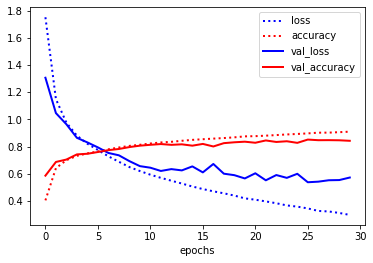

In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(3000, activation='relu'))
    model.add(layers.Dense(1500, activation='relu'))
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.0001, amsgrad=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=True, epochs=30, batch_size=128)

answer_q_1_1 = """
I found that a wide neural network yielded the best performance in combination with an amsgrad optimizer, learning rate of 0.0001 and batch size of 128. 
The hyperparameters were optimized using a grid search. Softmax was used as activation function of the output layer as our data is onehot encoded and the sum of the outputs equals one. 
The model achieved good accuracy but might be overfitting a bit as the training loss keeps decreasing while the validation loss is flattening out.
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [32]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(3000, activation='relu'))
    model.add(layers.Dense(1500, activation='relu'))
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.0001, amsgrad=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=True, epochs=30, batch_size=128)
answer_q_1_2 = """
The same model was used as in 1.1 but with grayscale images resulting in input shape of (32,32,1) as the images now only have one color channel. 
The model performed slightly better achieving 0.859 accuracy, likely because of the reduced dimensionality, but might still be overfitting. 
The color of the image does not add any substantial new information but still increases the dimensionality a lot, which is also more computationally expensive.
"""
print("Answer is {} characters long".format(len(answer_q_1_2)))

KeyboardInterrupt: ignored

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 3000)              3075000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 3000)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1500)              4501500   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 500)               750500    
_________________________________________________________________
dropout_5 (Dropout)  

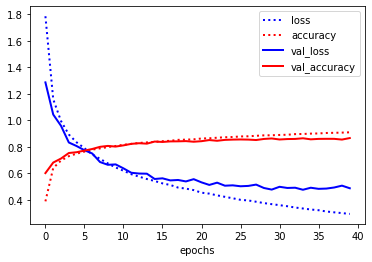

In [0]:
def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(3000, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1500, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.0001, amsgrad=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=True, epochs=40, batch_size=128)

answer_q_1_3 = """
Kernel regularizer L1 was ineffective and L2 resulted in much higher validation loss. 
Using dropout resulted in slightly better accuracy and lower validation loss, by allowing training for longer without overfitting.
Dropout rates were compared using a grid search for rates between 0.1 and 0.5. 
The model could still be overfitting a bit as training loss is decreasing while validation loss is flattening out.
"""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Training the model
Epoch 1/25
497/497 [==============================] - 6s 12ms/step - loss: 2.2319 - accuracy: 0.2009 - val_loss: 2.0258 - val_accuracy: 0.3509
Epoch 2/25
497/497 [==============================] - 6s 11ms/step - loss: 1.1501 - accuracy: 0.6128 - val_loss: 0.6172 - val_accuracy: 0.8069
Epoch 3/25
497/497 [==============================] - 6s 11ms/step - loss: 0.6743 - accuracy: 0.7863 - val_loss: 0.4521 - val_accuracy: 0.8623
Epoch 4/25
497/497 [==============================] - 6s 11ms/step - loss: 0.5505 - accuracy: 0.8283 - val_loss: 0.4237 - val_accuracy: 0.8671
Epoch 5/25
497/497 [==============================] - 6s 11ms/step - loss: 0.4844 - accuracy: 0.8514 - val_loss: 0.3485 - val_accuracy: 0.8944
Epoch 6/25
497/497 [==============================] - 6s 11ms/step - loss: 0.4357 - accuracy: 0.8668 - val_loss: 0.3231 - val_accuracy: 0.9025
Epoch 7/25
497/497 [==============================] - 6s 11ms/step - loss: 0.4027 - accuracy: 0.8769 - val_loss: 0.3064 - v

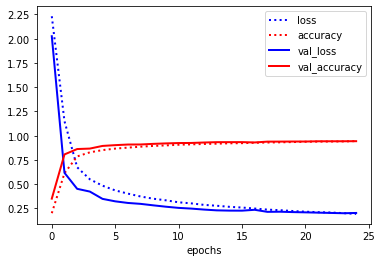

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model_2_1():
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(32, 32, 1)))
    model.add(layers.Reshape((32, 32, 1)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu',  padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu',  padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu',  padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.0001, amsgrad=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=True, epochs=25, batch_size=128)
answer_q_2_1 = """
The best performance was achieved by leveraging a combination of batch normalization and pooling+dropout layers.
A convolutional layer is followed by a batch normalization layer such that activations of the conv layer are standardized.
This is then followed by a conv layer with the same number of output filters, which is then followed by a maxpooling layer which summarizes the most activated presence of a feature and a dropout layer.
This is then repeated with double the number of output filters, up to 128.
The hidden dense layer was downsized and the hyperparameters were mostly kept from part 1.
The model achieves validation accuracy of 0.943 and does not seem to be overfitting up to epoch 25. As validation loss is still seemingly decreasing it might be underfitting a little bit.
"""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Training the model
Epoch 1/80
477/477 [==============================] - 37s 77ms/step - loss: 2.1317 - accuracy: 0.2447 - val_loss: 1.5841 - val_accuracy: 0.5134
Epoch 2/80
477/477 [==============================] - 29s 60ms/step - loss: 1.2252 - accuracy: 0.5896 - val_loss: 0.6307 - val_accuracy: 0.8055
Epoch 3/80
477/477 [==============================] - 29s 62ms/step - loss: 0.8497 - accuracy: 0.7249 - val_loss: 0.4575 - val_accuracy: 0.8587
Epoch 4/80
477/477 [==============================] - 30s 63ms/step - loss: 0.6953 - accuracy: 0.7799 - val_loss: 0.4013 - val_accuracy: 0.8780
Epoch 5/80
477/477 [==============================] - 30s 62ms/step - loss: 0.6037 - accuracy: 0.8094 - val_loss: 0.3613 - val_accuracy: 0.8884
Epoch 6/80
477/477 [==============================] - 30s 63ms/step - loss: 0.5416 - accuracy: 0.8306 - val_loss: 0.3291 - val_accuracy: 0.9020
Epoch 7/80
477/477 [==============================] - 29s 62ms/step - loss: 0.4948 - accuracy: 0.8468 - val_loss: 0.3

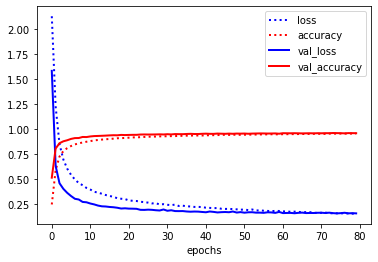

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data

datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,
                             zoom_range=[0.85, 1.15],
                             height_shift_range=0.1,
                             shear_range=0.1)

generator = datagen.flow(preprocessed_split[0], preprocessed_split[2], batch_size=128)

augmented_split = generator, preprocessed_split[1], preprocessed_split[3]


run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=True, generator=True, steps_per_epoch=477, epochs=80, batch_size=128)

answer_q_2_2 = """
Large rotations of 45+ degrees, horizontal and vertical flips were not effective at all, likely because it does not actually represent the digit anymore.
A little rotation, shear range, heigh shift and zoom proved effective. The amounts were optimized using a grid search.
The model achieves validation accuracy of 0.961 and does not seem to be overfitting as training and validation loss are roughly the same.
Also unlikely to be underfitting as validation loss does not seem to decrease anymore.
"""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

621/621 [==============================] - 2s 3ms/step - loss: 0.1511 - accuracy: 0.9612
Test accuracy:  0.9611743092536926
Test loss:  0.1511005163192749


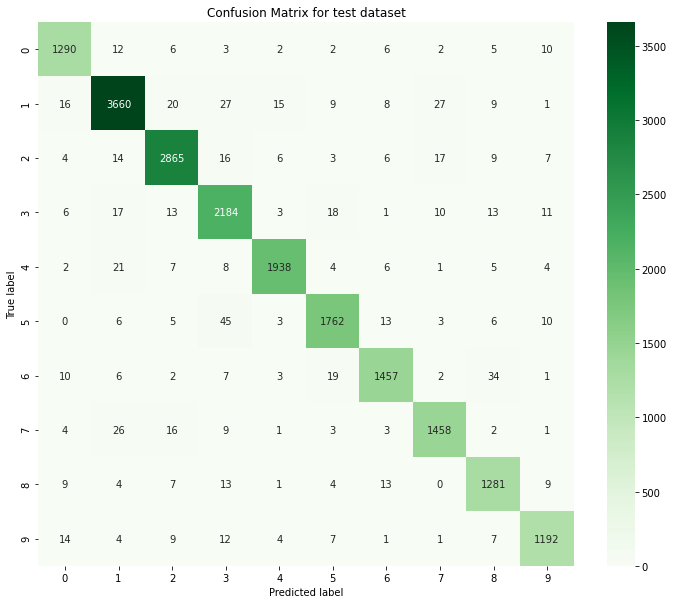

[8 2 1 ... 9 1 6]
[8 2 1 ... 9 1 6]


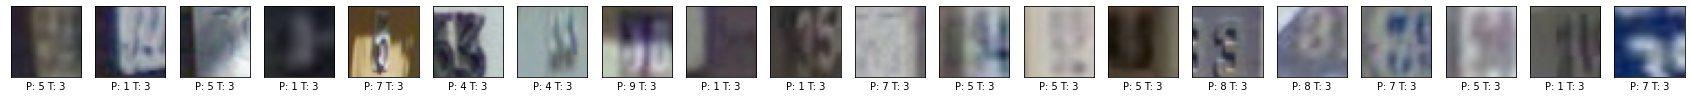

Answer is 494 characters long


In [0]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

test_accuracy_3_1 = 0.9612

def evaluate_on_test_data():
  model = load_model_from_file(base_dir, "model_2_2")
  loss, acc = model.evaluate(x=rgb2gray(X_test), y=y_test)
  print('Test accuracy: ', acc)
  print('Test loss: ', loss)

def plot_confusion_matrix():
  model = load_model_from_file(base_dir, "model_2_2")
  y_test_pred = model.predict(rgb2gray(X_test))

  new_y_test=(np.argmax(y_test, axis=1)+1)%10
  new_y_test_pred=(np.argmax(y_test_pred, axis=1)+1)%10
  cm = confusion_matrix(new_y_test, new_y_test_pred)

  fig, ax = plt.subplots(figsize=(12, 10))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
  plt.title('Confusion Matrix for test dataset')
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

def plot_misclassifications():
  model = load_model_from_file(base_dir, "model_2_2")
  y_test_pred = model.predict(rgb2gray(X_test))

  new_y_test=(np.argmax(y_test, axis=1)+1)%10
  new_y_test_pred=(np.argmax(y_test_pred, axis=1)+1)%10

  print(new_y_test)
  print(new_y_test_pred)

  incorrect_indices = [i for i,v in enumerate(new_y_test_pred) if (new_y_test_pred[i] != new_y_test[i] and new_y_test[i] == 3)]
  correct_indices = [i for i,v in enumerate(new_y_test_pred) if (new_y_test_pred[i] == new_y_test[i] and new_y_test[i] == 3)]

  incorrect = [X_test[i] for i in incorrect_indices]
  correct = [X_test[i] for i in incorrect_indices]

  fig, axes = plt.subplots(1, 20, figsize=(30, 10))
  for i, index in enumerate(incorrect_indices[:20]):
      axes[i].imshow(X_test[index])
      axes[i].set_xlabel('P: ' + str(new_y_test_pred[index]) + ' T: ' + str(new_y_test[index]))
      axes[i].set_xticks(()), axes[i].set_yticks(())
  plt.show();

evaluate_on_test_data()

plot_confusion_matrix()

plot_misclassifications()

answer_q_3_1 = """
The model achieved a test accuracy of 0.9612.
From the confusion matrix we can see that more similar numbers are more often confused than dissimilar numbers.
Our model struggles especially with the number 3, which is most often confused with 5 or 1.
When plotting the misclassifications, they are usually very low quality images with bad angles and difficult fonts where the stylized 3 has features usually attributed to some other digit.
Some images would not even be intelligible by humans.
"""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


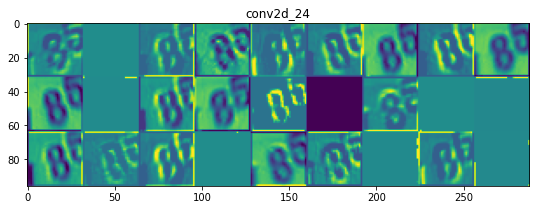

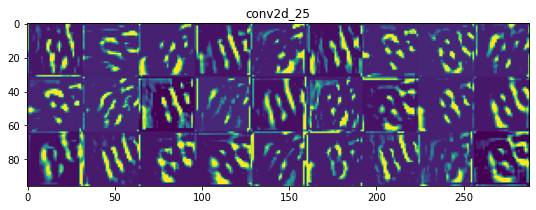

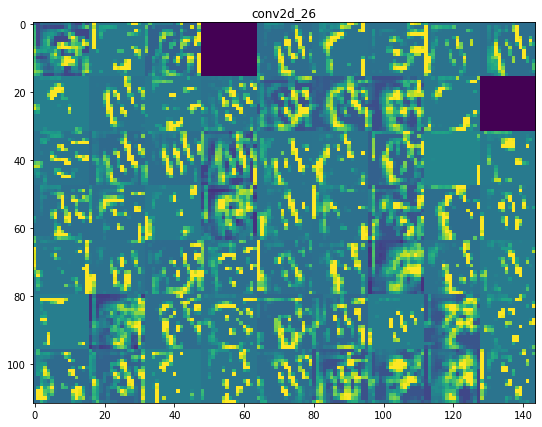

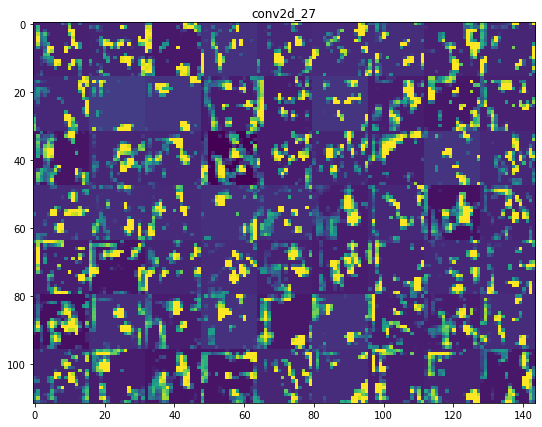

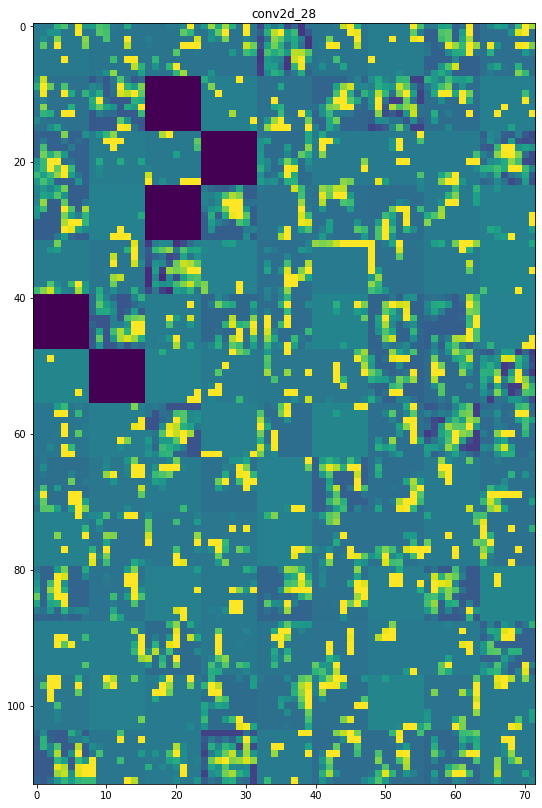

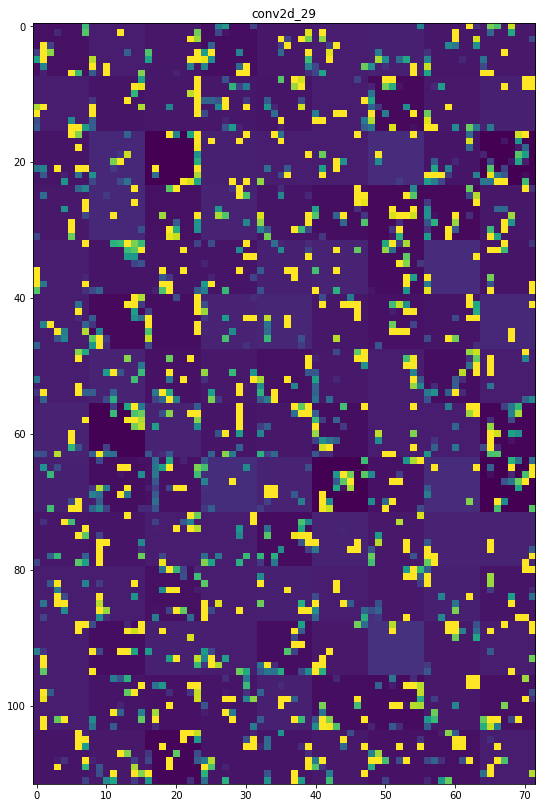

Answer is 499 characters long


In [0]:
def plot_activations():
  example_img = rgb2gray([X_test[0]])
  model = load_model_from_file(base_dir, "model_2_2")
  print(model.summary())
  layers = [model.get_layer('conv2d_24'), 
          model.get_layer('conv2d_25'),
          model.get_layer('conv2d_26'),
          model.get_layer('conv2d_27'),
          model.get_layer('conv2d_28'),
          model.get_layer('conv2d_29')]
  outputs = [layer.output for layer in layers]
  names = [layer.name for layer in layers]

  activation_model = tensorflow.keras.models.Model(inputs=model.input, outputs=outputs)
  # img = np.expand_dims(img, axis=0)
  activations = activation_model.predict(example_img)
  images_per_row = 9
  
  for name, activation in zip(names, activations): 
    n_features = activation.shape[-1]
    size = activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): 
        for row in range(images_per_row):
            channel_image = activation[0,:,:,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                        row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
  plt.show()

plot_activations()

answer_q_3_2 = """
In each plot we see how the image reacts to different filters, the image does not react to some filters at all, while reacting strongly to others as can be seen in first convolutional layer output. 
Some filters have a more vertical response while others have a more horizontal one, this can be seen especially well in the second and third convolutional layer outputs.
As we get into deeper layers, more higher level features are learned by our model and it is hard to understand what is going on.
"""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)       

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 720x1080 with 0 Axes>

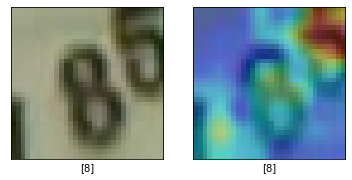

In [29]:
import cv2
import matplotlib.image as mpimg
from tensorflow.keras import backend as K

def plot_3_3():
  color_img = X_test[0]
  gray_img = rgb2gray([color_img])
  g = tensorflow.Graph()
  with g.as_default():
    model = load_model_from_file(base_dir, "model_2_2")
    
    model.summary()
    last_layer = model.get_layer('conv2d_29')
    y_test_pred = model.predict(gray_img)

    argmax = np.argmax(y_test_pred[0])
    output = model.output[:, argmax]

    # Disable eager execution
    tf.compat.v1.disable_eager_execution()
    grads = K.gradients(output, last_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([gray_img])

    for i in range(32):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)


    heatmap = cv2.resize(heatmap, (32, 32))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(np.uint8(255 * color_img), 0.6, heatmap, 0.4, 0)
    output = os.path.join(base_dir, 'superimposed.jpeg')
    cv2.imwrite(output, superimposed_img)

    img=mpimg.imread(output)

    plt.figure(figsize=(10, 15))

    f, axarr = plt.subplots(1, 2) 
    axarr[0].imshow(color_img)
    axarr[0].set_xticks(()), axarr[0].set_yticks(())
    axarr[0].set_xlabel((np.argmax(y_test_pred, axis=1)+1)%10)
    axarr[1].imshow(img)
    axarr[1].set_xticks(()), axarr[1].set_yticks(())
    axarr[1].set_xlabel((np.argmax(y_test_pred, axis=1)+1)%10)
    
    plt.show()


plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Trainable layers:
input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
sequential_3 True
Training the model
Epoch 1/6
497/497 [==============================] - 11s 22ms/step - loss: 1.0588 - accuracy: 0.6398 - val_loss: 0.7516 - val_accuracy: 0.7475
Epoch 2/6
497/497 [==============================] - 10s 21ms/step - loss: 0.6962 - accuracy: 0.7695 - val_loss: 0.6460 - val_accuracy: 0.7822
Epoch 3/6
497/497 [==============================] - 10s 21ms/step - loss: 0.5879 - accuracy: 0.8052 - val_loss: 0.6439 - val_accuracy: 0.7901
Epoch 4/6
497/497 [==============================] - 10s 21ms/step - loss: 0.5171 - accuracy: 0.8292 - val_loss: 0.5977 - val_accuracy: 0.8047
Epoch 5/6
497/497 [=======

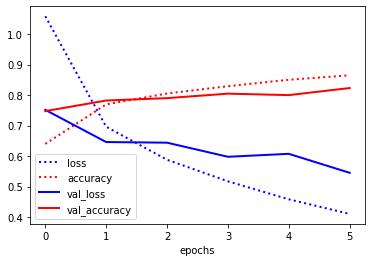

In [0]:
from tensorflow.keras.applications import VGG16

def build_model_4_1():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    top_model = models.Sequential()
    top_model.add(layers.Flatten())
    top_model.add(layers.Dense(256, activation='relu'))
    top_model.add(layers.Dropout(0.3))
    top_model.add(layers.Dense(10, activation='softmax'))

    model = models.Model(inputs= base_model.input, outputs=top_model(base_model.output))

    for layer in model.layers[:-5]:
      layer.trainable = False

    print('Trainable layers:')
    for layer in model.layers:
        print(layer.name, layer.trainable)

    model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.0001, amsgrad=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=True, epochs=6, batch_size=128)
answer_q_4_1 = """
Without unfreezing the last block of convolutional layers, the performance of the model was very bad and stuck below 60% validation accuracy.
When unfreezing the last block of conv layers, results were much better with validation accuracy of 0.823.
The model seems to be overfitting after 6 epochs when validation loss flattens out and training loss already decreasing rapidly.
"""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [0]:
import pickle
import gzip
from tensorflow.keras import models
from tensorflow.keras import layers 
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics, linear_model, preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  model = load_model_from_file(base_dir, "model_4_1")

  new_model = models.Sequential()
  for layer in model.layers[:-1]:
    new_model.add(layer)
  new_model.add(layers.Flatten())
  new_model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.0001, amsgrad=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

  new_model.summary()

  X_train_embedded = new_model.predict(X_train)
  X_test_embedded = new_model.predict(X_test)

  print(X_train_embedded.shape)
  print(X_test_embedded.shape)

  store_embedding(X_train_embedded, "X_train")
  store_embedding(X_test_embedded, "X_test")

def generate_pipeline():
    clf = RandomForestClassifier(random_state=1)
       
    pipeline = Pipeline(steps=[('classifier', clf)])
    
    return pipeline

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  X_train_embedded = load_embedding('X_train')
  X_test_embedded = load_embedding('X_test')
  y_test_class=(np.argmax(y_test, axis=1)+1)%10
  y_train_class=(np.argmax(y_train, axis=1)+1)%10
  pipeline.fit(X_train_embedded, y_train_class)
  y_test_pred = pipeline.predict(X_test_embedded)

  return accuracy_score(y_test_class, y_test_pred)

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  pipeline = generate_pipeline()
  accuracy = evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test)
  
  return accuracy

# store_embeddings()
print("Accuracy:",evaluation_4_2(X_train, y_train, X_test, y_test))

answer_q_4_2 = """
I constructed a new model from the model in 4.1 by taking the same layers without the last sequential layer and then adding a flatten layer.
I ran the images through it, and saving the output tensor as pickle file.
Random Forest was chosen, as linear regression would not converge and SVM took too long.
The model achieved accuracy 0.833 which is better than the model in 4.1 with the dense layers, but still not close to my best model.
"""
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Accuracy: 0.8333165474871588
Pipeline: Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=False))],
         verbose=False)
Answer is 438 characters long
